# Convolutional Denoising Autoencoder
- MNIST dataset
- Convolutional Neural Network
- 2 hidden layers

## 1. Settings
### 1) Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Set hyperparameters

In [2]:
batch_size = 100
learning_rate = 0.0002
num_epoch = 1

## 2. Data

### 1) Download Data

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### 2) Set DataLoader

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer
### 1) Model

In [5]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,16,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.Conv2d(16,32,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
encoder = Encoder().cuda()

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,16,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.ConvTranspose2d(16,1,3,2,1,1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

decoder = Decoder().cuda()

### 2) Loss func & Optimizer

In [7]:
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

## 5. Train 

In [8]:
try:
    encoder, decoder = torch.load('./model/conv_deno_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        noise = init.normal(torch.FloatTensor(batch_size,1,28,28),0,0.1)
        noise = Variable(noise.cuda())
        
        optimizer.zero_grad()
        
        image = Variable(image).cuda()
        noise_image = image + noise
        output = encoder(noise_image)
        output = decoder(output)
        loss = loss_func(output,image)
        
        loss.backward()
        optimizer.step()
        
        if j % 10 ==0:
            print(loss)        
            torch.save([encoder,decoder],'./model/conv_deno_autoencoder.pkl')



--------model restored--------

Variable containing:
1.00000e-03 *
  1.2172
[torch.cuda.FloatTensor of size 1 (GPU 0)]



/usr/local/lib/python3.5/dist-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.5/dist-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Variable containing:
1.00000e-03 *
  1.2208
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.1896
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2246
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2355
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2066
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2280
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2372
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2576
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2069
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2072
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.1843
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03

## 6. Check with Train Image

torch.Size([100, 28, 28])


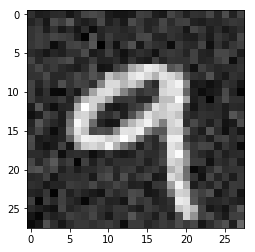

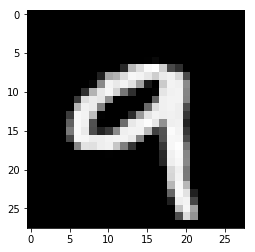

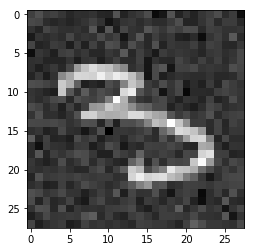

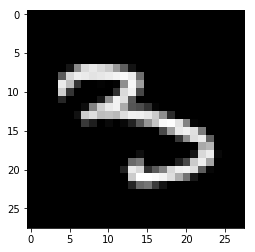

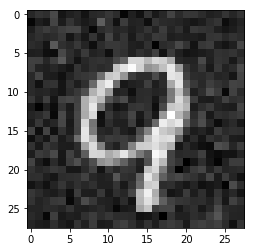

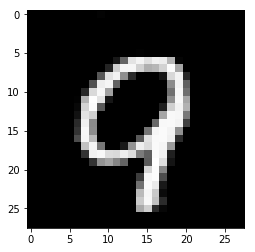

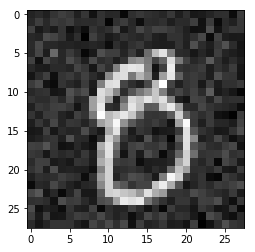

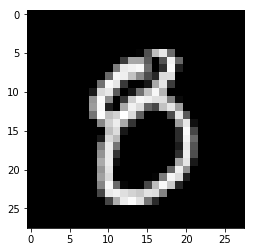

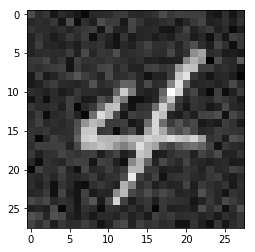

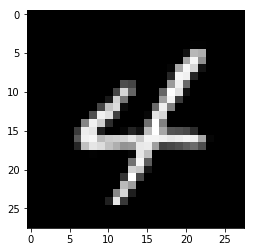

In [9]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(noise_image.cpu().data[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [10]:
noise = init.normal(torch.FloatTensor(batch_size,1,28,28),0,0.1)
noise = Variable(noise.cuda())

for i in range(1):
    for j,[image,label] in enumerate(test_loader):
       
        image = Variable(image,volatile=True).cuda()
        noise_image = image + noise
        output = encoder(noise_image)
        output = decoder(output)
        loss = loss_func(output,image)
        
        if j % 10 ==0:
            print(loss)        

Variable containing:
1.00000e-03 *
  1.3486
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.4568
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.4580
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.5828
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2822
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.3508
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  2.9815
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.3384
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  5.1656
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  2.7513
[torch.cuda.FloatTensor of size 1 (GPU 0)]



torch.Size([100, 28, 28])


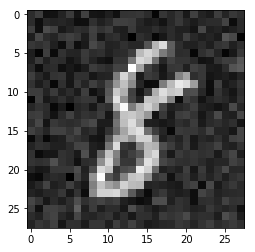

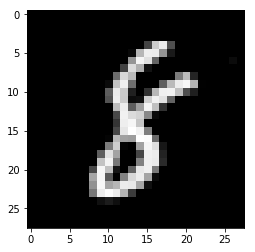

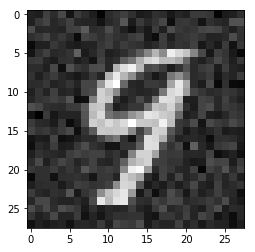

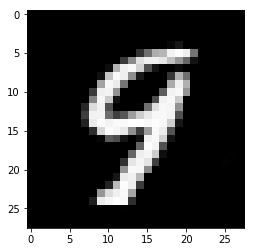

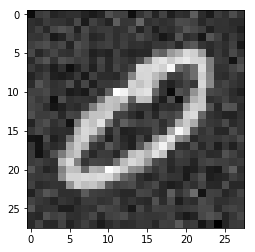

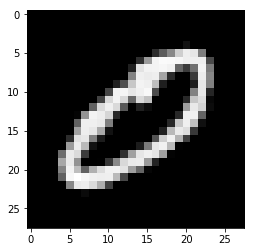

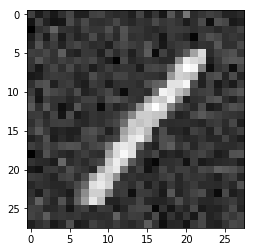

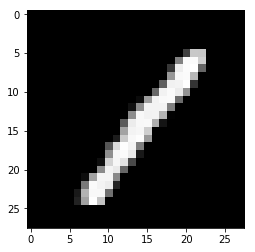

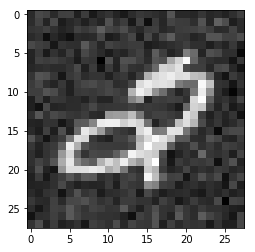

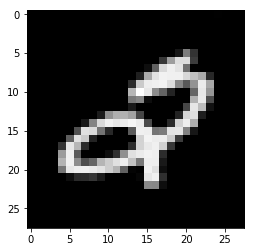

In [11]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(noise_image.cpu().data[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()